<a href="https://colab.research.google.com/github/katiaavidals/Module-1.-Python-Libraries-Statistics/blob/main/Notebook6_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.head(10)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


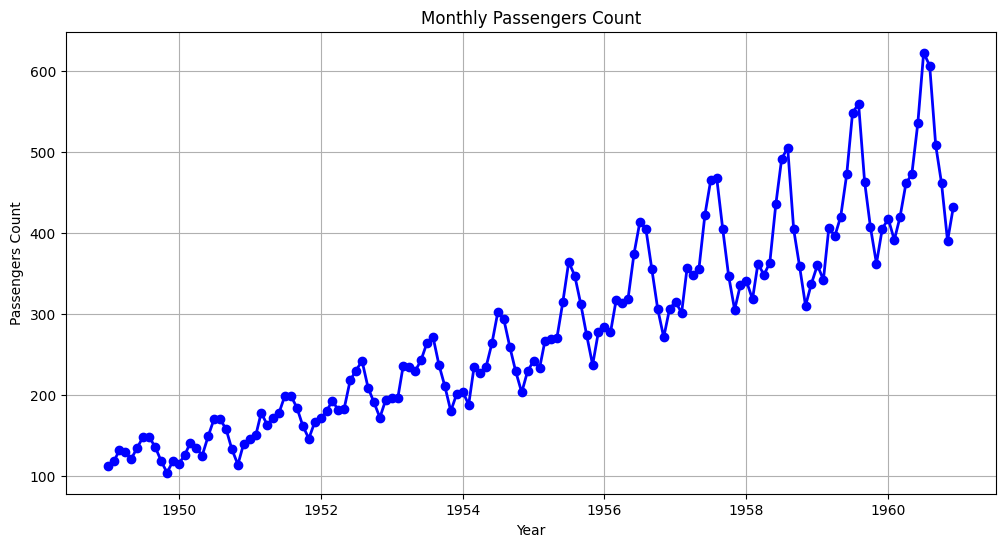

In [60]:
# Creating a line plot
plt.figure(figsize=(12,6))
plt.plot(df, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.title('Monthly Passengers Count')
plt.xlabel('Year')
plt.ylabel('Passengers Count')
plt.grid(True)
plt.show()

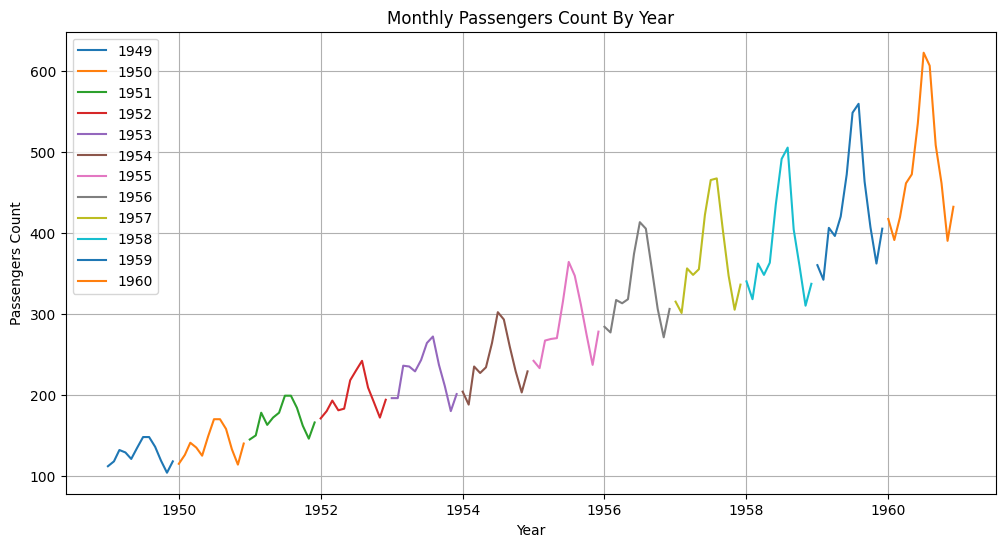

In [61]:
# Extract years from data
years = df.index.year.unique()

# Plotting each year as its own line
plt.figure(figsize=(12,6))
for year in years:
  year_data = df[df.index.year == year]
  plt.plot(year_data['Passengers'], label=year)

plt.title('Monthly Passengers Count By Year')
plt.xlabel('Year')
plt.ylabel('Passengers Count')
plt.legend()
plt.grid(True)
plt.show()

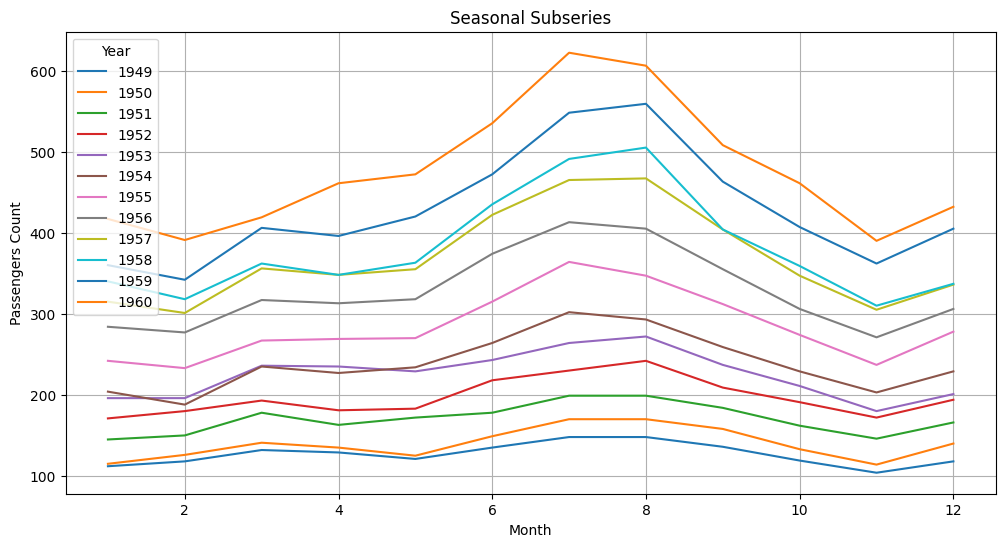

In [62]:
# Plot seasonal subseries
df['Year'] = df.index.year
df['month'] = df.index.month

# Pivot table
table = pd.pivot_table(df,
                       values='Passengers',
                       index=['month'],
                       columns='Year',
                       aggfunc='sum')

# Plot the series
fig, ax = plt.subplots(figsize=(12,6))
table.plot(ax=ax, kind='line', legend=True)
ax.set_xlabel('Month')
ax.set_ylabel('Passengers Count')
ax.set_title('Seasonal Subseries')
plt.grid(True)
plt.show()

/tmp/ipython-input-2348247343.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Passengers'], shade=True)


Text(0, 0.5, 'Density')

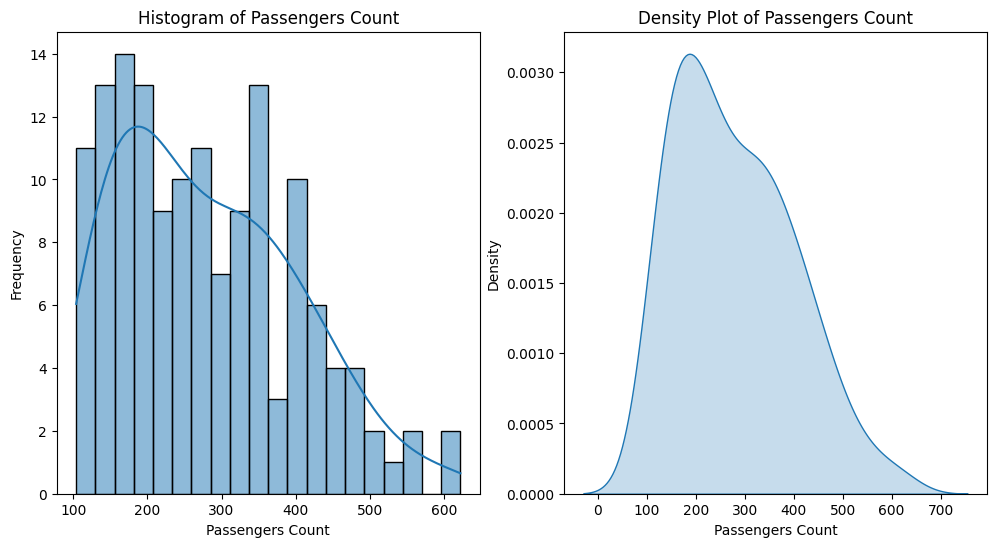

In [63]:
import seaborn as sns

# Histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Passengers'], bins=20, kde=True)
plt.title('Histogram of Passengers Count')
plt.xlabel('Passengers Count')
plt.ylabel('Frequency')

# Densidad
plt.subplot(1, 2, 2)
sns.kdeplot(df['Passengers'], shade=True)
plt.title('Density Plot of Passengers Count')
plt.xlabel('Passengers Count')
plt.ylabel('Density')

Exercise 1.

Use the Sunspots dataset (https://www.kaggle.com/datasets/robervalt/sunspots) to demonstrate basic concepts of time series

In [64]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv"
df = pd.read_csv(url, header=0, names=['Month', 'Sunspots'], parse_dates=['Month'], index_col='Month')

df.head(10)

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0
1749-06-01,83.5
1749-07-01,94.8
1749-08-01,66.3
1749-09-01,75.9


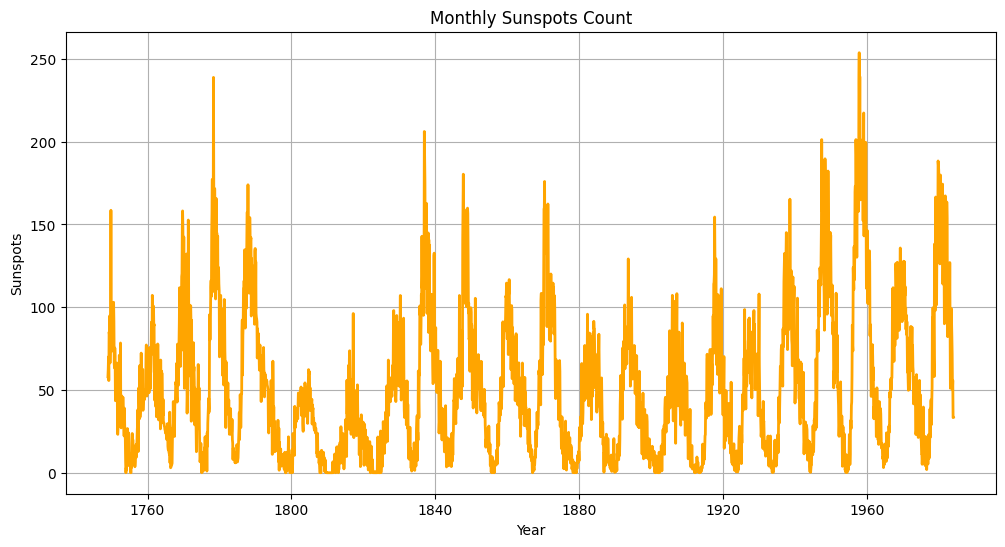

In [65]:
plt.figure(figsize=(12,6))
plt.plot(df['Sunspots'], color='orange', linewidth=2)
plt.title('Monthly Sunspots Count')
plt.xlabel('Year')
plt.ylabel('Sunspots')
plt.grid(True)
plt.show()

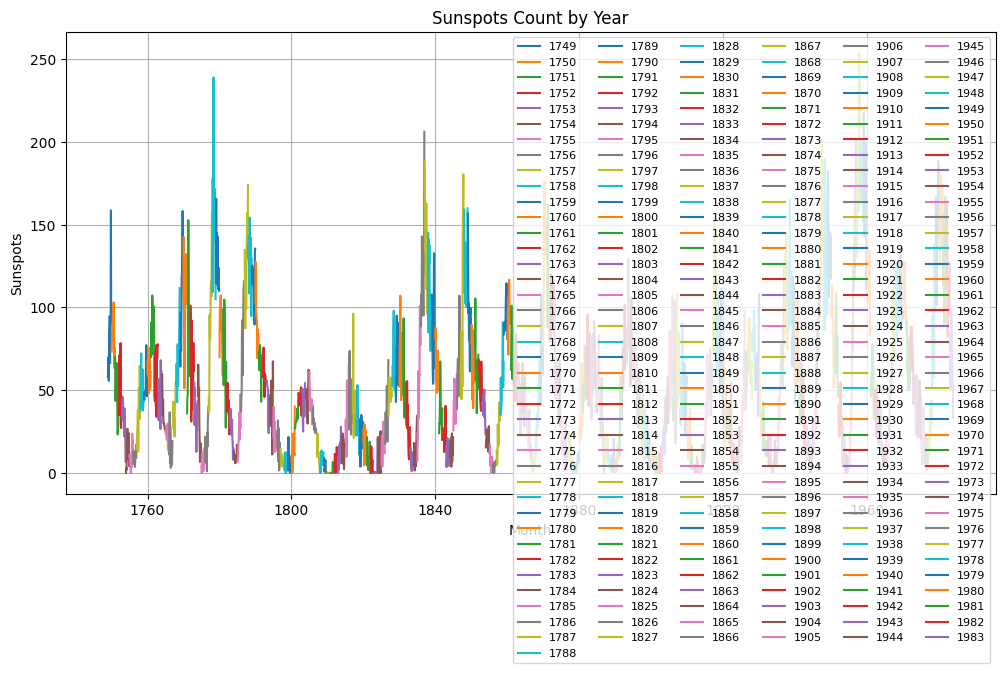

In [66]:
years = df.index.year.unique()

plt.figure(figsize=(12,6))
for year in years:
    yearly = df[df.index.year == year]
    plt.plot(yearly['Sunspots'], label=year)

plt.title('Sunspots Count by Year')
plt.xlabel('Month')
plt.ylabel('Sunspots')
plt.legend(loc='upper right', ncol=6, fontsize=8)
plt.grid(True)
plt.show()

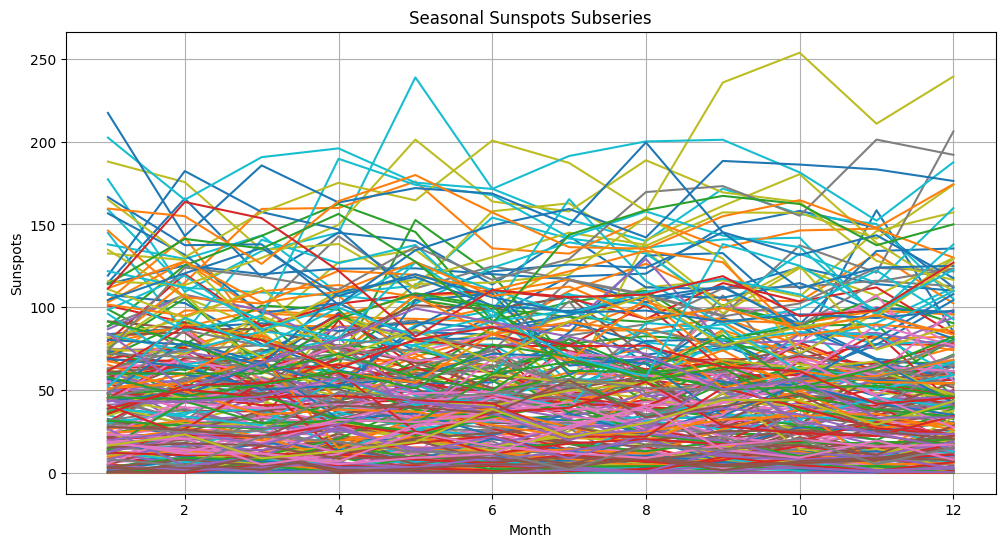

In [67]:
df['Year'] = df.index.year
df['MonthNum'] = df.index.month

table = pd.pivot_table(
    df,
    values='Sunspots',
    index='MonthNum',
    columns='Year',
    aggfunc='mean'
)

fig, ax = plt.subplots(figsize=(12,6))
table.plot(ax=ax, legend=False)
ax.set_xlabel('Month')
ax.set_ylabel('Sunspots')
ax.set_title('Seasonal Sunspots Subseries')
plt.grid(True)
plt.show()

/tmp/ipython-input-687196021.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Sunspots'], shade=True, color='orange')


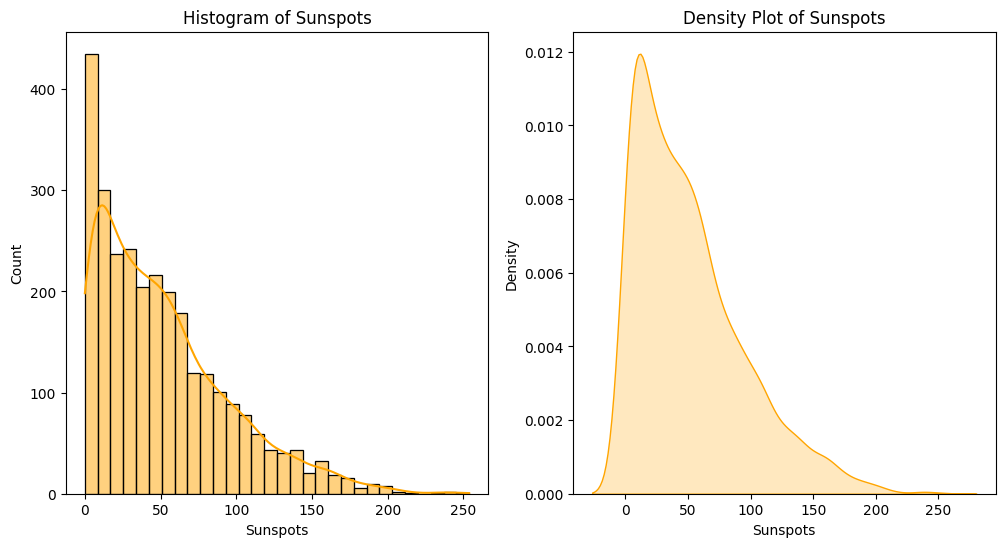

In [68]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.histplot(df['Sunspots'], bins=30, kde=True, color='orange')
plt.title('Histogram of Sunspots')
plt.xlabel('Sunspots')

plt.subplot(1, 2, 2)
sns.kdeplot(df['Sunspots'], shade=True, color='orange')
plt.title('Density Plot of Sunspots')
plt.xlabel('Sunspots')

plt.show()

Exercise 2.

Use the Unemployment in America dataset(https://www.kaggle.com/datasets/justin2028/unemployment-in-america-per-us-state)

In [69]:
import kagglehub

path = kagglehub.dataset_download("justin2028/unemployment-in-america-per-us-state")
print("Path to dataset files:", path)


Using Colab cache for faster access to the 'unemployment-in-america-per-us-state' dataset.
Path to dataset files: /kaggle/input/unemployment-in-america-per-us-state


In [70]:
import os
os.listdir(path)

['Unemployment in America Per US State.csv']

In [71]:
df = pd.read_csv(path + "/Unemployment in America Per US State.csv")
df.head()

,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,"98,532",6.6
1,2,Alaska,1976,1,"232,000","160,183",69.0,"148,820",64.1,"11,363",7.1
2,4,Arizona,1976,1,"1,621,000","964,120",59.5,"865,871",53.4,"98,249",10.2
3,5,Arkansas,1976,1,"1,536,000","889,044",57.9,"824,395",53.7,"64,649",7.3
4,6,California,1976,1,"15,621,000","9,774,280",62.6,"8,875,685",56.8,"898,595",9.2


In [72]:
df.rename(columns={"Value": "Unemployment_Rate"}, inplace=True)

print("Primeras filas:")
df.head()

print("\nValores faltantes:")
df.isnull().sum()

Primeras filas:

Valores faltantes:


,0
FIPS Code,0
State/Area,0
Year,0
Month,0
Total Civilian Non-Institutional Population in State/Area,0
Total Civilian Labor Force in State/Area,0
Percent (%) of State/Area's Population,0
Total Employment in State/Area,0
Percent (%) of Labor Force Employed in State/Area,0
Total Unemployment in State/Area,0


In [73]:
df.columns

Index(['FIPS Code', 'State/Area', 'Year', 'Month',
       'Total Civilian Non-Institutional Population in State/Area',
       'Total Civilian Labor Force in State/Area',
       'Percent (%) of State/Area's Population',
       'Total Employment in State/Area',
       'Percent (%) of Labor Force Employed in State/Area',
       'Total Unemployment in State/Area',
       'Percent (%) of Labor Force Unemployed in State/Area'],
      dtype='object')

In [74]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + "-" + df['Month'].astype(str) + "-01")
df = df.sort_values('Date')

In [75]:
series = df.groupby('Date')['Percent (%) of Labor Force Unemployed in State/Area'].mean()
series.head()


,Percent (%) of Labor Force Unemployed in State/Area
Date,
1976-01-01,7.281132
1976-02-01,7.284906
1976-03-01,7.252830
1976-04-01,7.196226
1976-05-01,7.120755


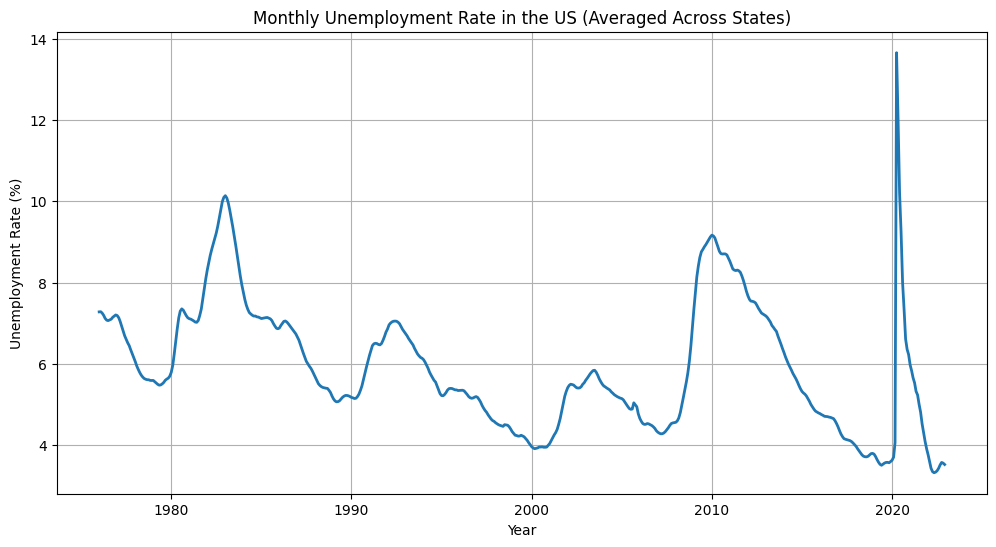

In [76]:
plt.figure(figsize=(12,6))
plt.plot(series, linewidth=2)
plt.title('Monthly Unemployment Rate in the US (Averaged Across States)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

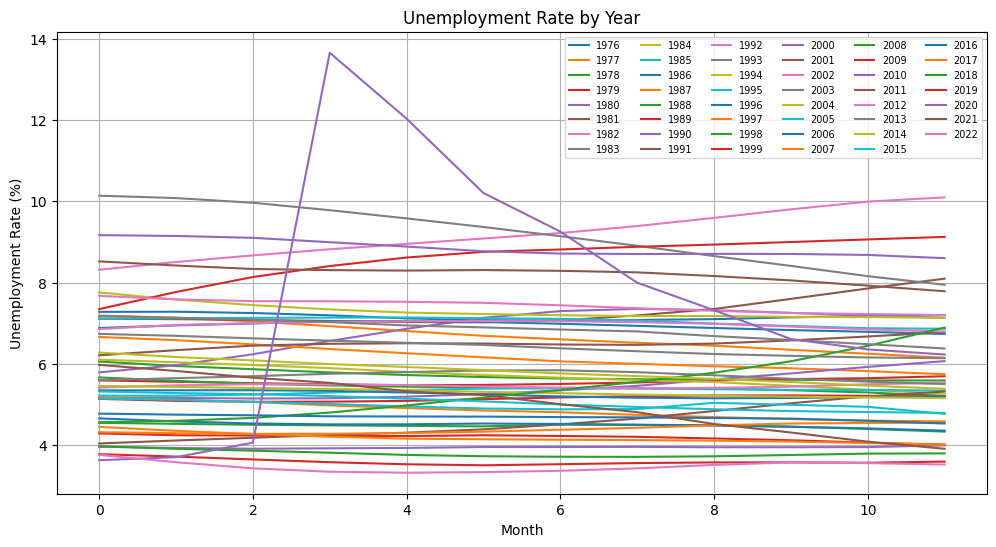

In [77]:
years = series.index.year.unique()

plt.figure(figsize=(12,6))
for y in years:
    y_data = series[series.index.year == y]
    plt.plot(y_data.values, label=y)

plt.title('Unemployment Rate by Year')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.legend(ncol=6, fontsize=7)
plt.grid(True)
plt.show()

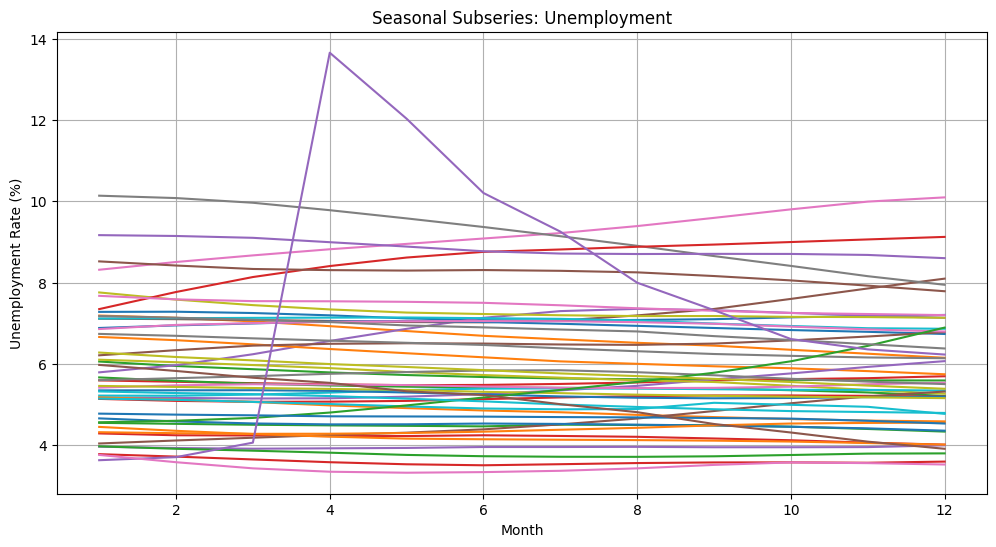

In [78]:
temp = pd.DataFrame()
temp['Value'] = series.values
temp['Month'] = series.index.month
temp['Year'] = series.index.year

pivot = temp.pivot_table(values='Value', index='Month', columns='Year', aggfunc='mean')

pivot.plot(figsize=(12,6), legend=False)
plt.title('Seasonal Subseries: Unemployment')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

/tmp/ipython-input-1424458103.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(series, shade=True)


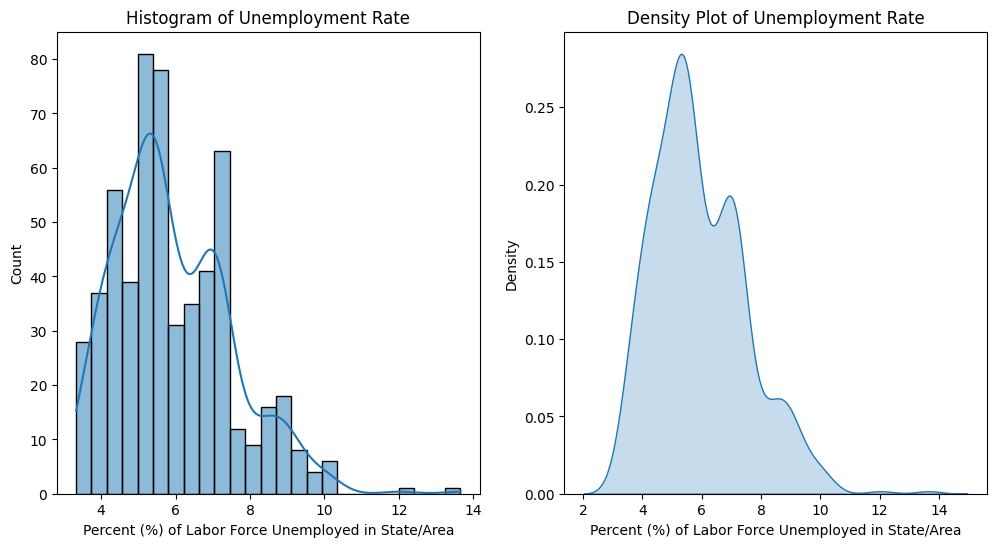

In [79]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(series, bins=25, kde=True)
plt.title('Histogram of Unemployment Rate')

plt.subplot(1,2,2)
sns.kdeplot(series, shade=True)
plt.title('Density Plot of Unemployment Rate')
plt.show()